In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

In [2]:
import numpy as np
out_arr = np.full((4,19),-np.inf,dtype=object)


1 spectrum  in use
 
Spectral Data File: P0932190901PNS003SRSPEC0001.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.649e-02 +/- 2.148e-03 (69.1 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-16
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 8713 sec
 Using fit statistic: chi
 Using Background File                P0932190901PNS003BGSPEC0001.FTZ
  Background Exposure Time: 8713 sec
 Using Response (RMF) File            epn_e3_ff20_sdY2.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0932190901PNS003SRCARF0001.FTZ



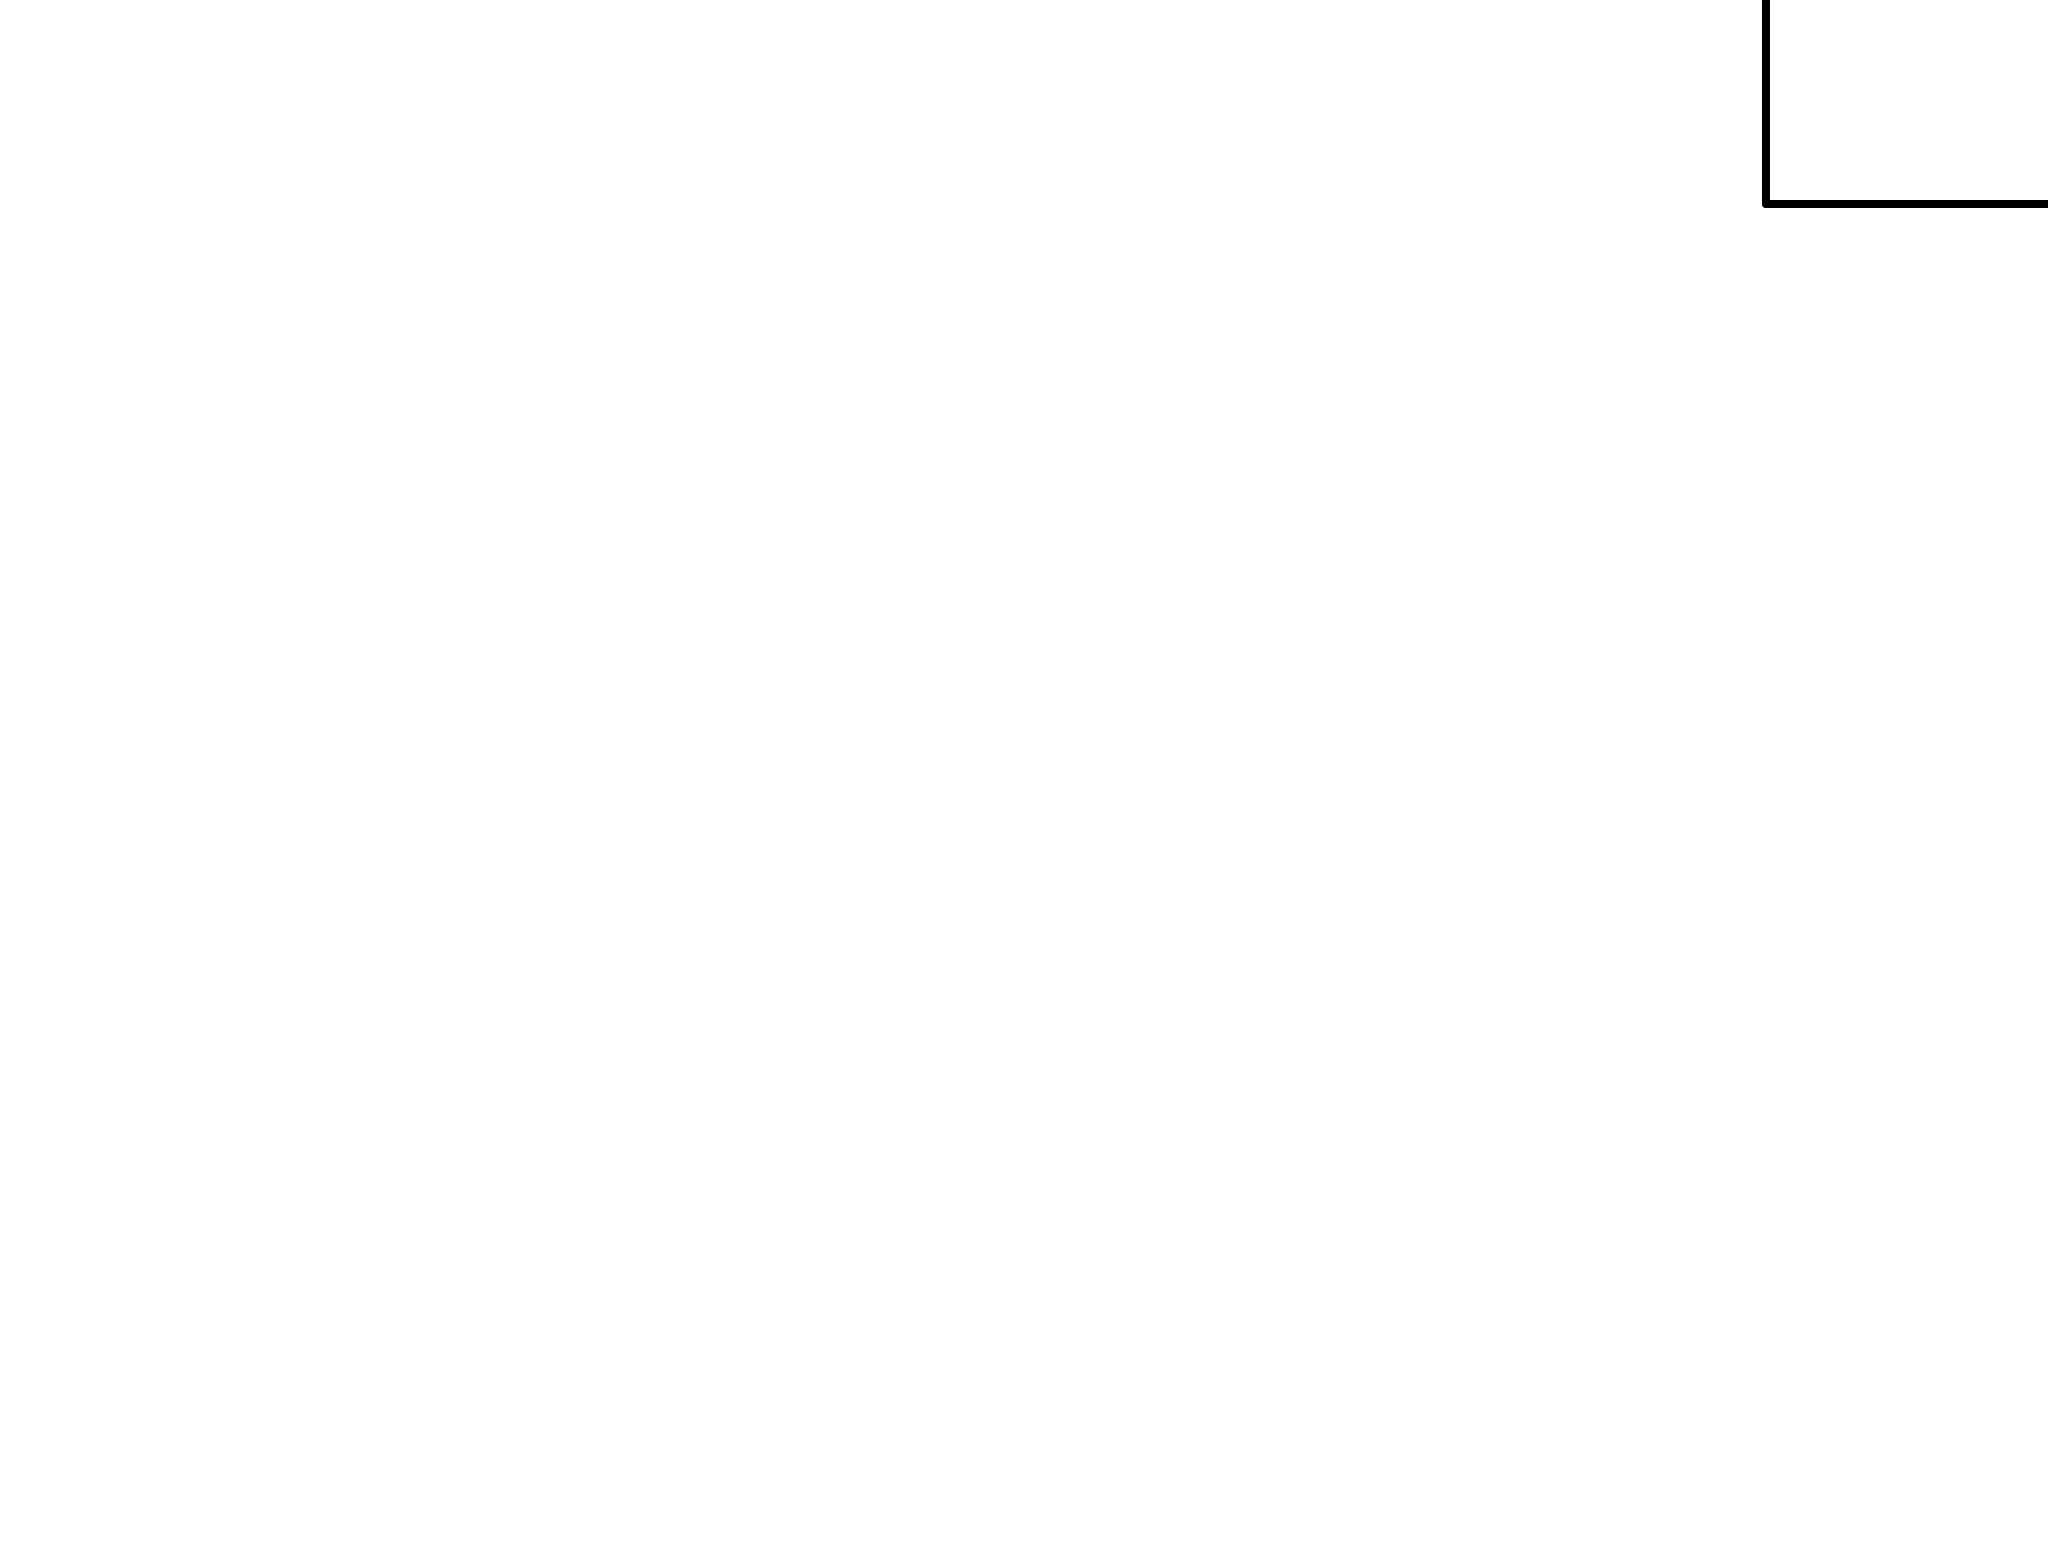

In [3]:
spec_fnames = glob.glob('P*901PNS*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.0001 0.2")
Plot("data")

      No channels ignored (no channels in specified range)
     1 channels (16) ignored in spectrum #     1


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross s

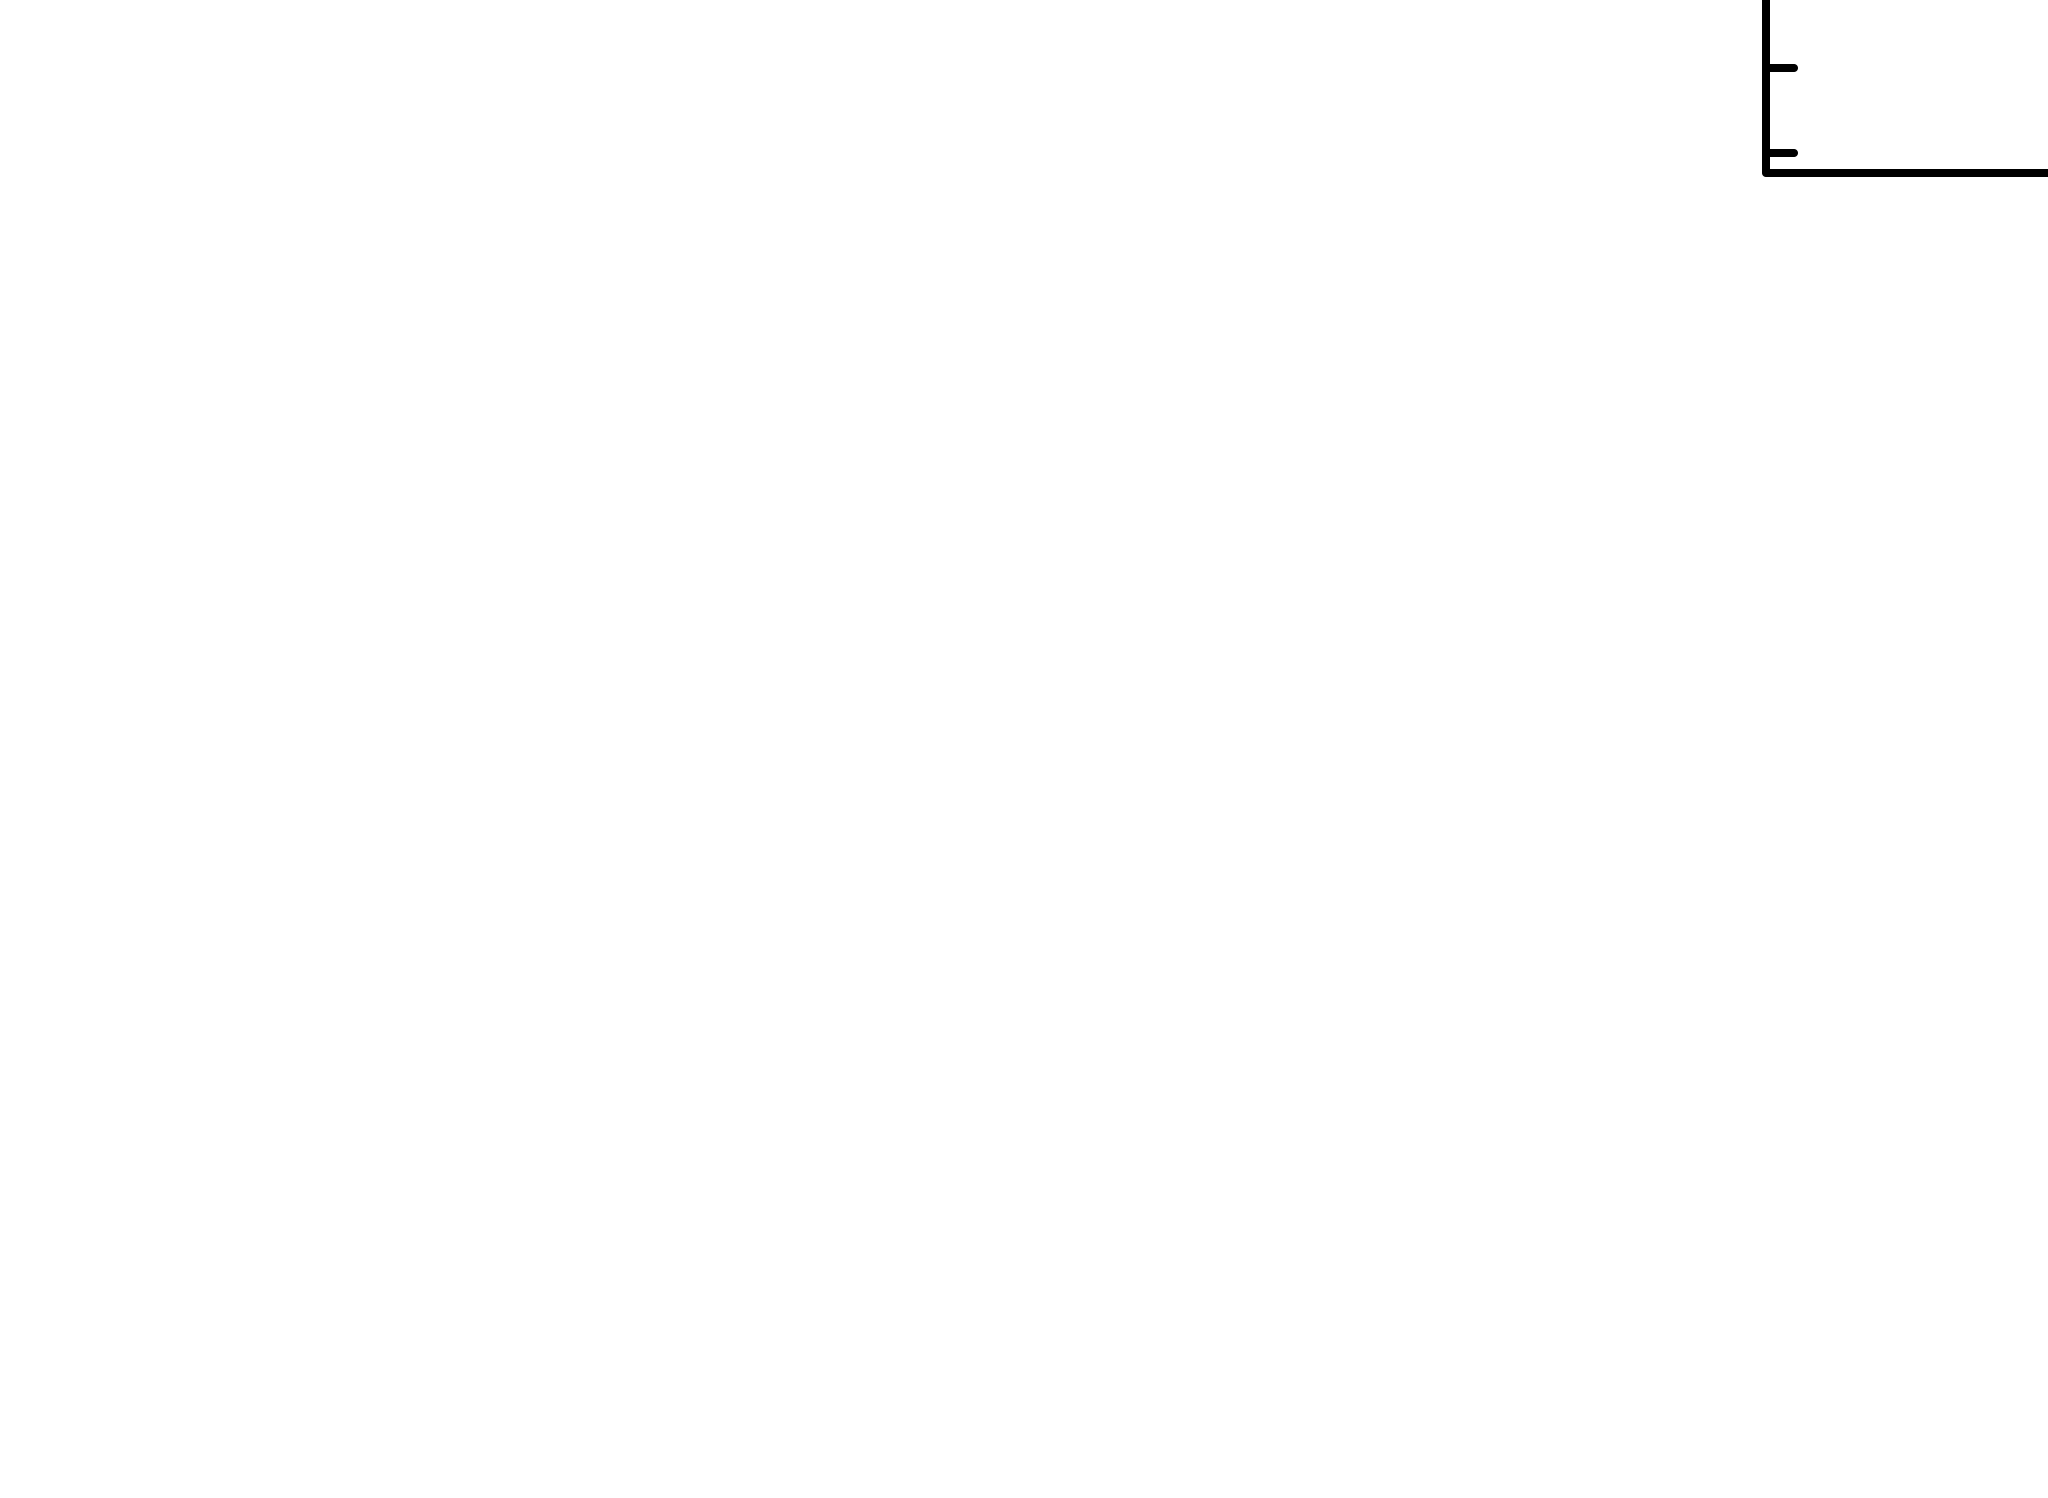

ection setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              5.356656e+11     using 15 bins.

Test statistic : Chi-Squared              5.356656e+11     using 15 bins.
 Null hypothesis probability of 0.000000e+00 with 12 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
213.648      0.0296053     0      0.352429       3.04375   3.57228e-07
213.379      90758.4       0     0.0663498       2.97203   3.61005e-07
213.177      206143        0     0.0234907       2.79078   3.85302e-07
212.964      260383        0    0.00639148       2.61850   4.10032e-07
212.765      303362        0    0.00302572       2.46880   4.31646e-07
212.567      331917        0   0.000293348       2.34344   4.48535e-07
212.378      356753        0   7.26473e-06       2.23456   4.61742e-07
212.192      375647        0   3.42801e-06     

In [4]:
spec.ignore("**-0.2 12.0-**")
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

In [5]:
Fit.error("1")
Fit.error("2")

out_arr[0,0] = 'bbody'
out_arr[0,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[0,4:7] = mo.bbody.kT.values[0], mo.bbody.kT.values[0] - mo.bbody.kT.error[0], mo.bbody.kT.error[1] - mo.bbody.kT.values[0]
out_arr[0,-2:] = Fit.dof, Fit.statistic / Fit.dof


 Parameter   Confidence Range (2.706)
     1      0.15101     0.539425    (-0.160065,0.228349)
 Parameter   Confidence Range (2.706)
     2     0.109502     0.177124    (-0.0313354,0.0362862)


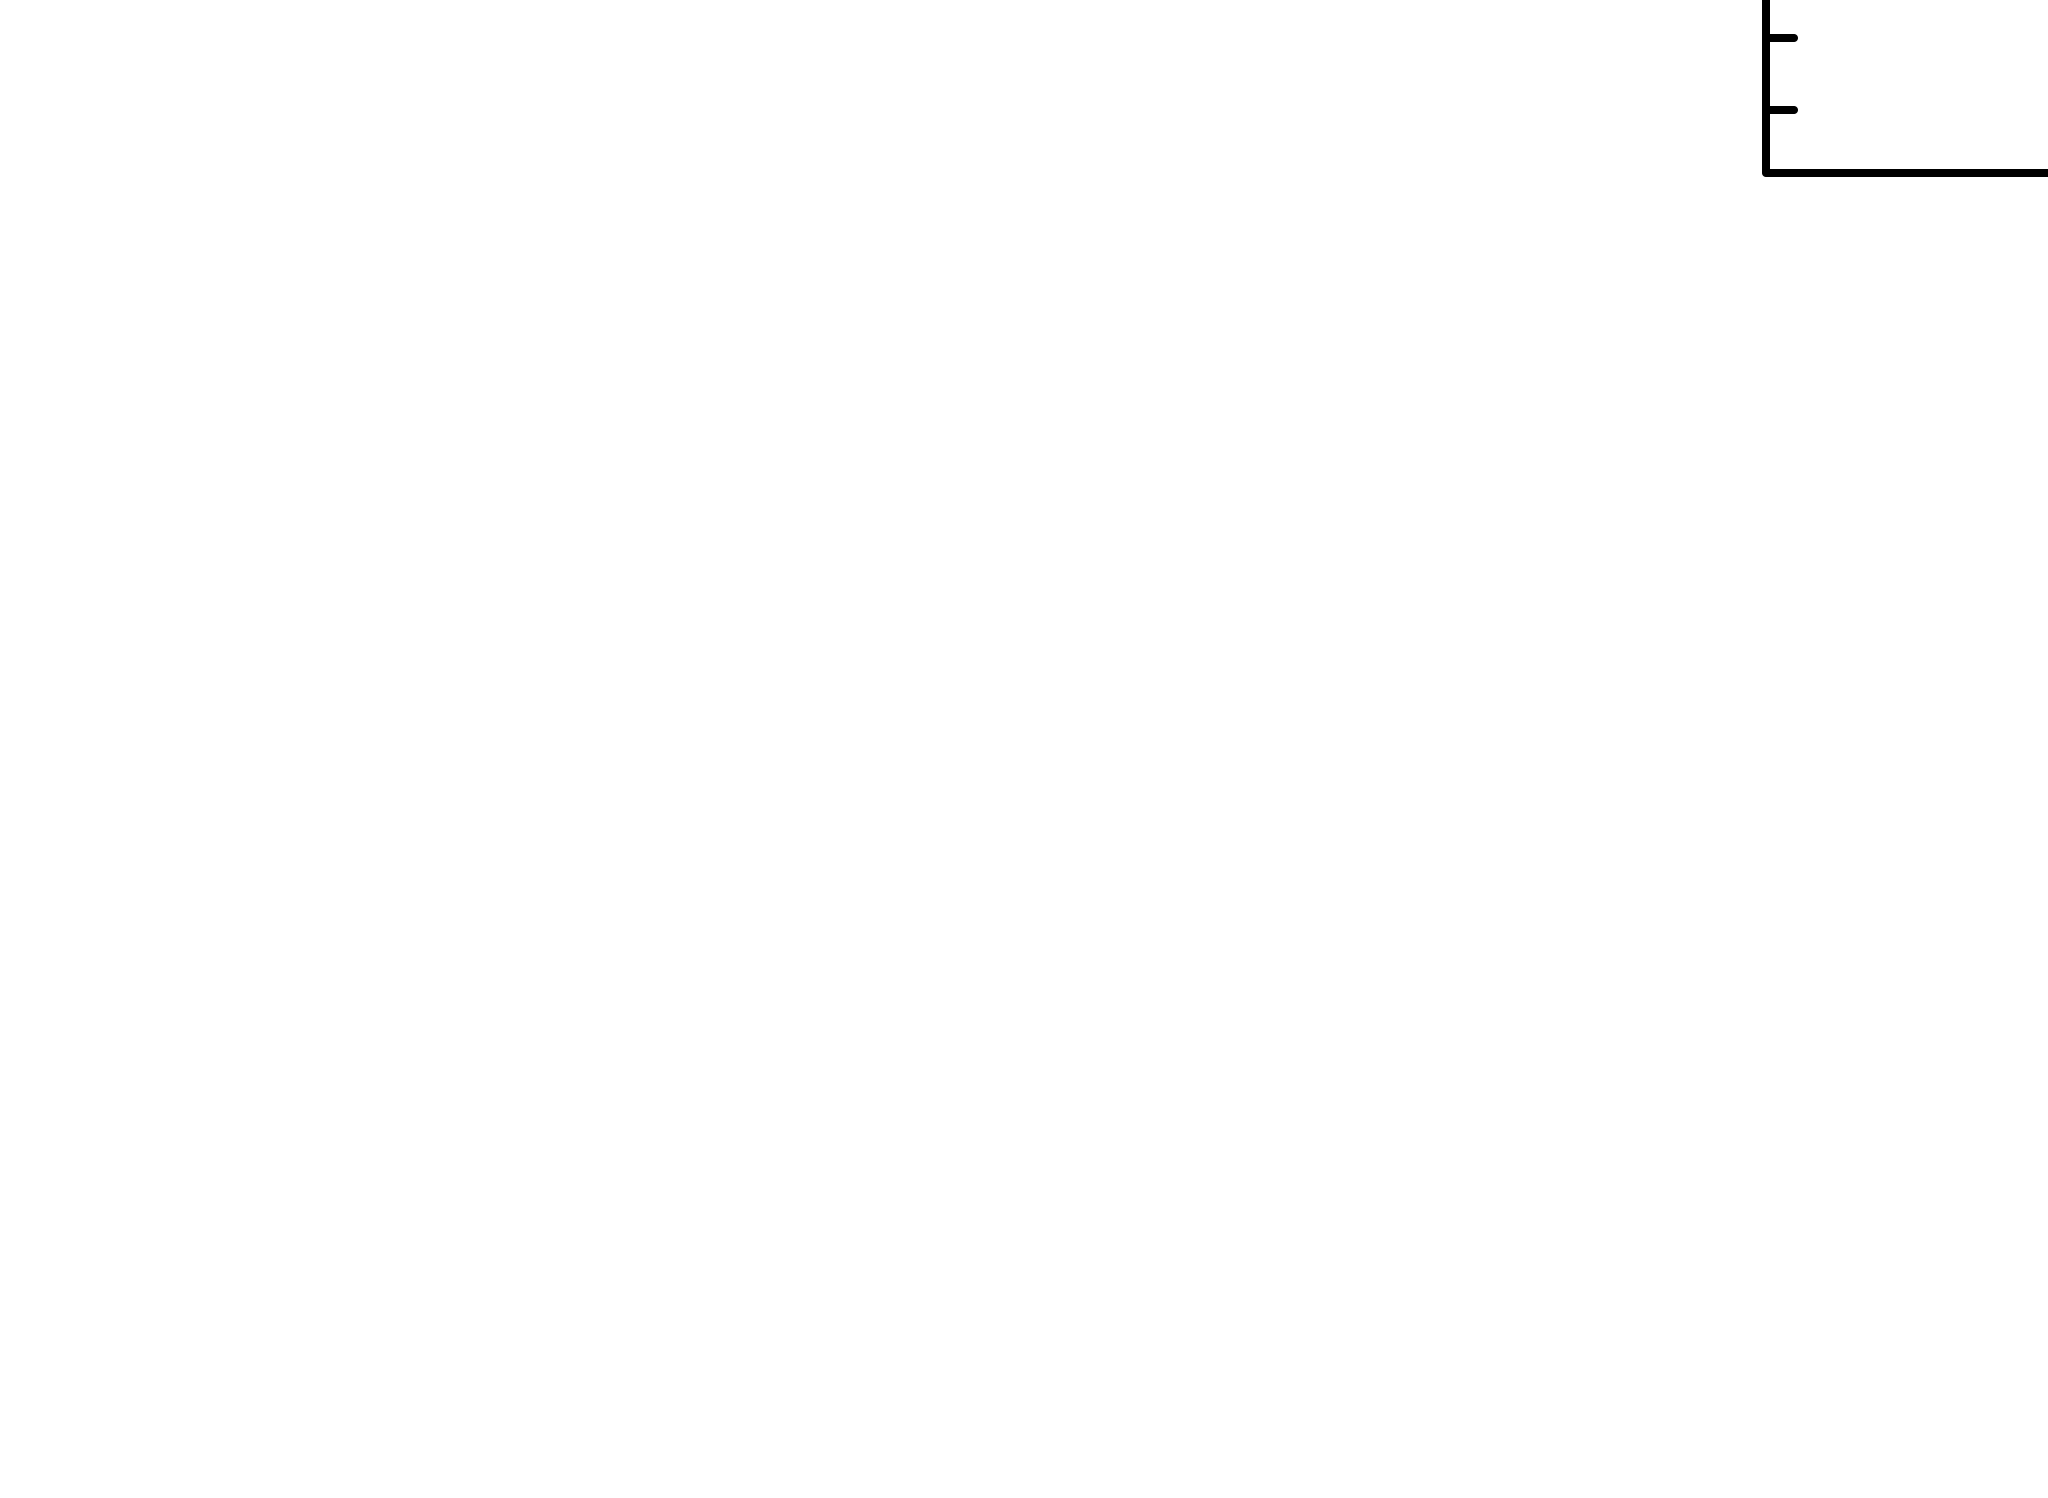


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.577170e+11     using 15 bins.

Test statistic : Chi-Squared              1.577170e+11     using 15 bins.
 Null hypothesis probability of 0.000000e+00 with 12 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
207.013      0.729981      0      0.208112       1.61507   1.80145e-06
139.923      609354        0     0.0924426       4.71154   7.32547e-06
112.058      643990       -1      0.147819       3.33492   1.98330e-0

In [6]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

In [7]:
Fit.error("1")
Fit.error("2")

out_arr[1,0] = 'powerlaw'
out_arr[1,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[1,14:17] = mo.powerlaw.PhoIndex.values[0], mo.powerlaw.PhoIndex.values[0] - mo.powerlaw.PhoIndex.error[0], mo.powerlaw.PhoIndex.error[1] - mo.powerlaw.PhoIndex.values[0]
out_arr[1,-2:] = Fit.dof, Fit.statistic / Fit.dof


Cannot do error calc: Reduced Chi^2 (= 2.08089) > maximum (2)


Exception: Error executing command: error

In [ ]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")

In [ ]:
Fit.error("1")
Fit.error("2")

out_arr[3,0] = 'bremss'
out_arr[3,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[3,4:7] = mo.bremss.kT.values[0], mo.bremss.kT.values[0] - mo.bremss.kT.error[0], mo.bremss.kT.error[1] - mo.bremss.kT.values[0]
out_arr[3,-2:] = Fit.dof, Fit.statistic / Fit.dof


In [ ]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

In [ ]:
AllModels.clear()
mo = Model("tbabs*(apec+apec)")
mo.apec.kT = 0.25
mo.apec_3.kT = 4.0
Fit.perform()
Plot("data resid")

In [ ]:
Fit.error("1")
Fit.error("2")
Fit.error("6")

out_arr[2,0] = 'apec+apec'
out_arr[2,1:4] = mo.TBabs.nH.values[0], mo.TBabs.nH.values[0] - mo.TBabs.nH.error[0], mo.TBabs.nH.error[1] - mo.TBabs.nH.values[0]
out_arr[2,13] = mo.apec.Abundanc.values[0]
out_arr[2,4:7] = mo.apec.kT.values[0], mo.apec.kT.values[0] - mo.apec.kT.error[0], mo.apec.kT.error[1] - mo.apec.kT.values[0]
out_arr[2,7:10] = mo.apec_3.kT.values[0], mo.apec_3.kT.values[0] - mo.apec_3.kT.error[0], mo.apec_3.kT.error[1] - mo.apec_3.kT.values[0]
out_arr[2,-2:] = Fit.dof, Fit.statistic / Fit.dof


In [ ]:
np.savetxt('../spec56.1_output.csv',out_arr,fmt=['%s','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.2f','%.1f','%.2f','%.2f','%.2f','%i','%.2f'],delimiter=',')


In [ ]:
AllModels.calcFlux(".2 12.0")

In [ ]:
plx = 4.1476
d_kpc = 1/plx
F_x = 9.6383*10**-14

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

In [ ]:
import numpy as np
print(d_kpc)
print(np.log10(L_x))

In [ ]:
F_opt = 1.05*10**-5 * 10**(-0.4*12.93)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', np.log10(F_x/F_opt))

In [ ]:
AllModels.clear()
mo = Model("tbabs*(apec+apec+apec)")
mo.apec.kT = 0.25
mo.apec_3.kT = 4.0
mo.apec_4.kT = 10.0
Fit.perform()
Plot("data resid")